## imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!wget -nc https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_2/main/imageNetLabels.py

--2021-12-25 11:27:38--  https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_2/main/imageNetLabels.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30786 (30K) [text/plain]
Saving to: ‘imageNetLabels.py’

imageNetLabels.py   100%[===================>]  30.06K  --.-KB/s    in 0.003s  

2021-12-25 11:27:38 (11.0 MB/s) - ‘imageNetLabels.py’ saved [30786/30786]



In [3]:
import tensorflow as tf  
print(tf.__version__)    
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input
import imageNetLabels
from keras.callbacks import ModelCheckpoint   
import time
from sklearn.model_selection import train_test_split
import cv2
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims


2.7.0


In [4]:
dictionary = imageNetLabels.IMAGENET_CLASSES
mobileDim = (224, 224 )
largeDim = (331 ,331)
shape_large = (1 , 331 ,331 , 3)
shape_mobile = (1, 224 , 224, 3)
mobile = (224, 224, 3)
large  = (331, 331 ,3)

In [5]:
def get_model_classif_nasnet():
    inputs = Input(large)
    xx = tf.cast(inputs, tf.float32)
    xxx = tf.keras.applications.nasnet.preprocess_input(xx)
    base_model = NASNetLarge(include_top=True, input_shape=large , weights = 'imagenet' )
    base_model.trainable = False
    x = base_model(xxx)
    model = Model(inputs, x)
    model.summary(  )
    model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])
    return model , base_model

## define and test model

In [141]:
model , base_model = get_model_classif_nasnet()

Model: "model_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_43 (InputLayer)       [(None, 331, 331, 3)]     0         
                                                                 
 tf.cast_11 (TFOpLambda)     (None, 331, 331, 3)       0         
                                                                 
 tf.math.truediv_11 (TFOpLam  (None, 331, 331, 3)      0         
 bda)                                                            
                                                                 
 tf.math.subtract_11 (TFOpLa  (None, 331, 331, 3)      0         
 mbda)                                                           
                                                                 
 NASNet (Functional)         (None, 1000)              88949818  
                                                                 
Total params: 88,949,818
Trainable params: 0
Non-trainable

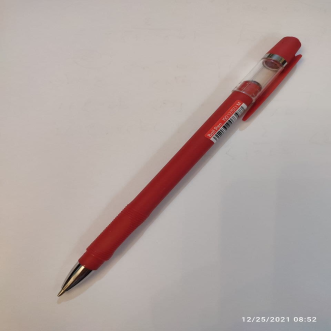

In [142]:
ballpoint = cv2.imread('ballpen.jpg' , cv2.IMREAD_UNCHANGED)
# cv2_imshow(ballpoint)
resizedballpoint = cv2.resize(ballpoint, largeDim, interpolation = cv2.INTER_AREA)
resizedballpoint.shape
cv2_imshow(resizedballpoint)

In [143]:
array = model.predict (np.reshape( resizedballpoint , shape_large) )
tf.keras.applications.nasnet.decode_predictions( array, top=5 )

[[('n02783161', 'ballpoint', 0.86631215),
  ('n04116512', 'rubber_eraser', 0.006280166),
  ('n06785654', 'crossword_puzzle', 0.004073032),
  ('n03658185', 'letter_opener', 0.0010049171),
  ('n03388183', 'fountain_pen', 0.0009728647)]]

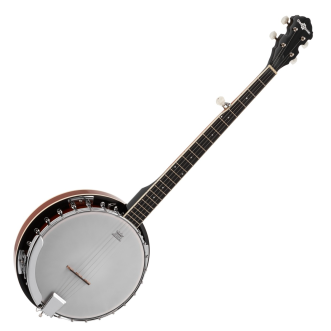

In [144]:
banjo = cv2.imread('banjo.jpg' , cv2.IMREAD_UNCHANGED)
# cv2_imshow(ballpoint)
resizedbanjo = cv2.resize(banjo, largeDim, interpolation = cv2.INTER_AREA)
resizedbanjo.shape
cv2_imshow(resizedbanjo)

In [145]:
array = model.predict (np.reshape( resizedbanjo , shape_large) )
tf.keras.applications.nasnet.decode_predictions( array, top=5 )

[[('n02787622', 'banjo', 0.8982173),
  ('n03249569', 'drum', 0.00044679872),
  ('n04536866', 'violin', 0.00042520507),
  ('n02672831', 'accordion', 0.00040374626),
  ('n02992211', 'cello', 0.00038404626)]]

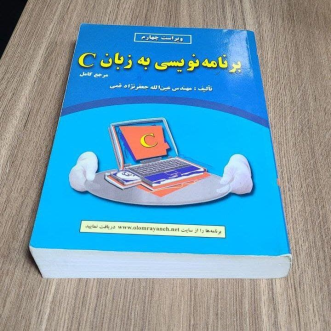

In [146]:
book = cv2.imread('dumb.jpg' , cv2.IMREAD_UNCHANGED)
# cv2_imshow(ballpoint)
resizedbook = cv2.resize(book, largeDim, interpolation = cv2.INTER_AREA)
cv2_imshow(resizedbook)

In [147]:
array = model.predict (np.reshape( resizedbook , shape_large) )
tf.keras.applications.nasnet.decode_predictions( array, top=5 )

[[('n07248320', 'book_jacket', 0.452873),
  ('n03871628', 'packet', 0.27567384),
  ('n06596364', 'comic_book', 0.013114747),
  ('n02840245', 'binder', 0.009167196),
  ('n06359193', 'web_site', 0.006569542)]]

## visualize features

In [137]:
for i , layer in enumerate(model.layers):
    if 'normal_conv' not in layer.name:
      continue
    print(i, layer.name, layer.output.shape)

116 normal_conv_1_0 (None, 42, 42, 168)
161 normal_conv_1_1 (None, 42, 42, 168)
207 normal_conv_1_2 (None, 42, 42, 168)
252 normal_conv_1_3 (None, 42, 42, 168)
297 normal_conv_1_4 (None, 42, 42, 168)
342 normal_conv_1_5 (None, 42, 42, 168)
444 normal_conv_1_7 (None, 21, 21, 336)
489 normal_conv_1_8 (None, 21, 21, 336)
534 normal_conv_1_9 (None, 21, 21, 336)
579 normal_conv_1_10 (None, 21, 21, 336)
624 normal_conv_1_11 (None, 21, 21, 336)
669 normal_conv_1_12 (None, 21, 21, 336)
771 normal_conv_1_13 (None, 11, 11, 672)
816 normal_conv_1_14 (None, 11, 11, 672)
861 normal_conv_1_15 (None, 11, 11, 672)
906 normal_conv_1_16 (None, 11, 11, 672)
950 normal_conv_1_17 (None, 11, 11, 672)


In [ ]:
model = NASNetLarge(include_top=True, input_shape=large , weights = 'imagenet' )
model = Model(inputs=model.inputs, outputs=[model.layers[117].output , model.layers[162].output , model.layers[951].output , model.layers[994].output])
img = load_img('bee.jpg', target_size=largeDim)
img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
xx = tf.cast(img, tf.float32)
xxx = tf.keras.applications.nasnet.preprocess_input(xx)


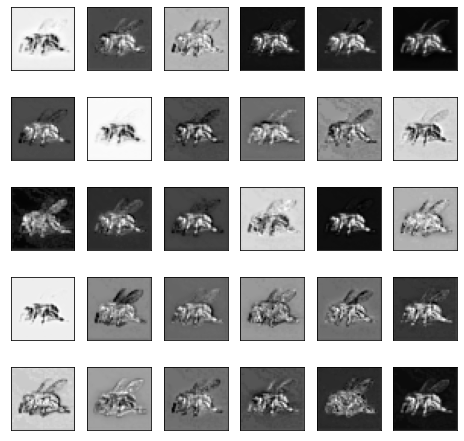

In [139]:
feature_maps = model.predict(xxx)[0]
ix = 1
plt.figure(figsize = (8 , 8))
for _ in range(dim1):
	for _ in range(dim2):
		ax = pyplot.subplot(dim1, dim2, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

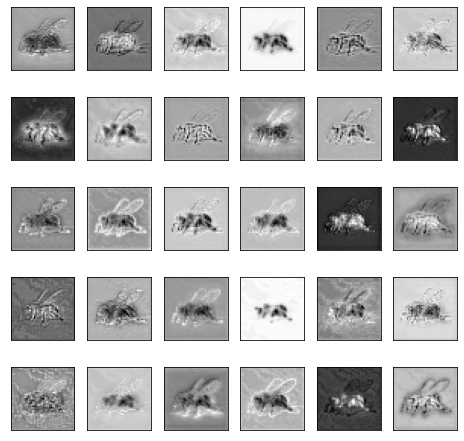

In [138]:
feature_maps = model.predict(xxx)[1]
ix = 1
plt.figure(figsize = (8 , 8))
for _ in range(dim1):
	for _ in range(dim2):
		ax = pyplot.subplot(dim1, dim2, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

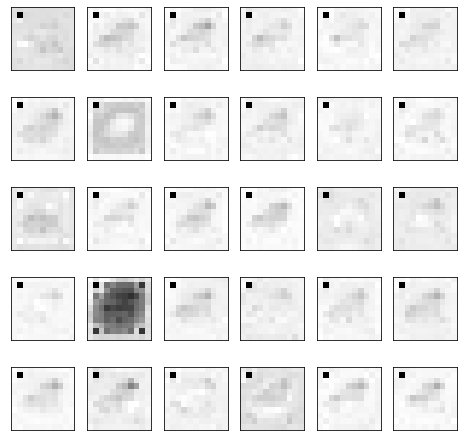

In [136]:
feature_maps = model.predict(xxx)[2]
ix = 1
plt.figure(figsize = (8 , 8))
for _ in range(dim1):
	for _ in range(dim2):
		ax = pyplot.subplot(dim1, dim2, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

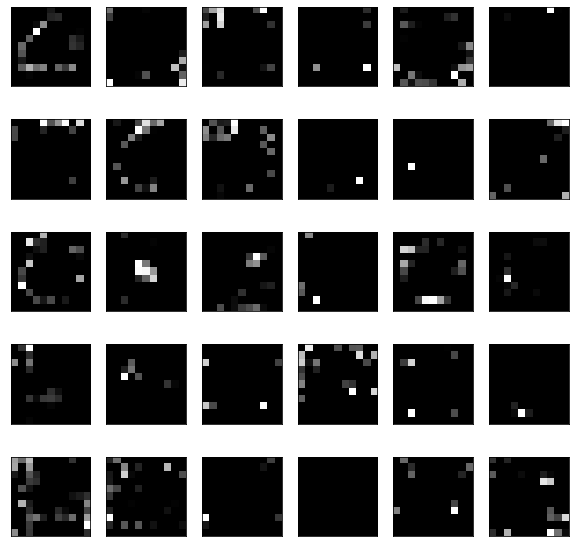

In [134]:
feature_maps = model.predict(xxx)[3]
ix = 1
plt.figure(figsize = (10 , 10))
dim1 = 5
dim2 = 6
for _ in range(dim1):
	for _ in range(dim2):
		ax = pyplot.subplot(dim1, dim2, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1
pyplot.show()

## two class classification

In [48]:
def getNASNETlargeModel():
    sh = (331,331,3)
    inputs = Input(large)
    xx = tf.cast(inputs, tf.float32)
    xxx = tf.keras.applications.nasnet.preprocess_input(xx)
    base_model = NASNetLarge(include_top=False, input_shape=large , weights = 'imagenet' )
    base_model.trainable = False
    x = base_model(xxx)
    out3 = GlobalAveragePooling2D()(x)
    # out2 = GlobalAveragePooling2D()(x)
    # out3 = Flatten()(gmp)
    # out = Concatenate(axis=-1)([out1, out2, out3])
    out2 = Dense(5, activation=tf.keras.activations.relu, name="3_")(out3)
    out1 = Dropout(0.5)(out2)
    out = Dense(1, activation=tf.keras.activations.softmax, name="1_")(out1)
    model = Model(inputs, out)
    model.summary(  )
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])
    return model

In [49]:
def preprocess(img, label):
    return tf.image.resize(img, [331, 331 ]) / 255, label
 

In [50]:

import tensorflow_datasets.public_api as tfds
(trainDataset_, validationDataset_ , testDataset_), info = tfds.load(
    'cats_vs_dogs',
    split = ('train[:8%]', 'train[8%:10%]' , 'train[10%:12%]'),
    with_info = True,
    as_supervised = True
)

In [51]:
classNames = ['cat', 'dog']
# split = ['train[20%:30%]', 'train[30%:35%]' , 'train[45%:50%]']
# trainDataset_, validationDataset_ ,testDataset_ = tfds.load(name='cats_vs_dogs', split=split, as_supervised=True)


In [52]:

# x_train , y_train = [    (tf.image.resize(img, [331, 331 ]) / 255 ).numpy(), label.numpy() for img, label in trainDataset_]
# x_val , y_val =     [    (tf.image.resize(img, [331, 331 ]) / 255 ).numpy(), label.numpy() for img, label in validationDataset_]
# x_test , y_test =   [    (tf.image.resize(img, [331, 331 ]) / 255 ).numpy(), label.numpy() for img, label in testDataset_]

# # testDataset = [(example.numpy(), label.numpy()) for image, label in testDataset_]


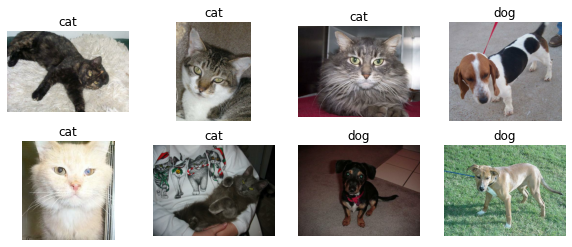

In [53]:
i = 0
plt.figure(figsize = (10  , 4))
for image, label in testDataset_.take(8):
    plt.subplot(2,4, i+1)
    plt.title(classNames[label])
    plt.imshow(image)

    plt.axis('off')
    i += 1 
plt.show()

In [54]:
bs = 128
trainDataset = trainDataset_.map(preprocess).batch(bs)
testDataset = testDataset_.map(preprocess).batch(bs)
validationDataset = validationDataset_.map(preprocess).batch(bs)

In [55]:
model = getNASNETlargeModel()


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 331, 331, 3)]     0         
                                                                 
 tf.cast_2 (TFOpLambda)      (None, 331, 331, 3)       0         
                                                                 
 tf.math.truediv_2 (TFOpLamb  (None, 331, 331, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_2 (TFOpLam  (None, 331, 331, 3)      0         
 bda)                                                            
                                                                 
 NASNet (Functional)         (None, 11, 11, 4032)      84916818  
                                                                 
 global_average_pooling2d_2   (None, 4032)             0   

In [ ]:
import time
start = time.time() # for stopwatch
trainHistory = model.fit(trainDataset, batch_size = bs , epochs=10,  validation_data=validationDataset)
end = time.time()
took = end -start
print("took %s seconds"%(took))


plt.plot(trainHistory.history['accuracy'])
plt.plot(trainHistory.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.grid()
plt.show()
 
(loss, accuracy) = model.evaluate(testDataset)
print(loss)
print(accuracy)
 
model.save('model.h5')

Epoch 1/10
11/15 [=====================>........] - ETA: 32s - loss: 0.7159 - acc: 0.4822